In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50) # показывать больше строк в таблице
pd.set_option('display.max_columns', 50) # показывать больше колонок в таблице

# Загружаем файл со студентами
exam = pd.read_csv('stud_math.csv')

In [2]:
# Предобработка

# Функция для вывода на экран информации о столбцах
def info_col(name_col):
    print('Информация о столбце', name_col, '\n')
    
    print('Какие значения содержатся:')
    display(exam[name_col].value_counts(dropna=False))
    
    print('Тип данных:')
    display(exam.loc[:, [name_col]].info())
    
    display(exam[name_col].hist(label = name_col))
    plt.legend()
    
# Функция для расчёта статистических параметров: iqr, квартили, границы выбросов
def quan_info(name_col):
    # Перцентили и IQR
    perc25 = exam[name_col].quantile(0.25)
    perc75 = exam[name_col].quantile(0.75)
    iqr = perc75 - perc25
    # Границы выбросов
    low = perc25 - 1.5*iqr
    high = f=perc75 + 1.5*iqr
# Печатаем вычисленные значения на экране    
    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(iqr),
        "Границы выбросов: [{f}, {l}].".format(f=low, l=high))

# Тест Стьдента для номинативных признаков
def get_stat_dif(column):
    cols = exam.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
   
    for comb in combinations_all:
        if ttest_ind(exam.loc[exam.loc[:, column] == comb[0], 'score'], 
                        exam.loc[exam.loc[:, column] == comb[1], 'score'], nan_policy = 'omit').pvalue \
            <= 0.1/len(combinations_all): # Учли поправку Бонферони и уровень доверия 10%
            print('Найдены статистически значимые различия для столбца', column)
            break

In [3]:
# Выводим таблицу на экран, чтоб посмотреть, с чем будем работать.
display(exam)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [4]:
#Выводим информацию о таблице
display(exam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

Как видим, в таблице очень много пропущенных значений. Если удалять все строки, можно потерять существенную часть информации. Поэтому такие строки будем оставлять.

In [5]:
# 13 и 20 строку занимают похожие названия: 'studytime' и 'studytime, granular'
# Проверим, какие данные содержатся в этих столбцах

display(exam[['studytime', 'studytime, granular']].value_counts())

studytime  studytime, granular
2.0        -6.0                   194
1.0        -3.0                   103
3.0        -9.0                    64
4.0        -12.0                   27
dtype: int64

In [6]:
# Проверяем корреляцию между этими данными
display(exam[['studytime', 'studytime, granular']].corr())

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [7]:
# Как мы видим, столбец 'studytime, granular' полностью повторяет столбец 'studytime' с коэффициентом -3.
# Поэтому для дальнейшего анализа столбец 'studytime, granular' не нужен, можно удалить его из таблицы

exam.drop(['studytime, granular'], inplace=True, axis=1)
display(exam)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [8]:
# Переименуем некоторые колонки для стандартизации и облегчения восприятия
exam.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out',
                'health', 'absences', 'score']
display(exam)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Начинаем проверять данные в числовых столбцах, используя раннее заданную функцию info_col.

Информация о столбце age 

Какие значения содержатся:


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


None

<AxesSubplot:>

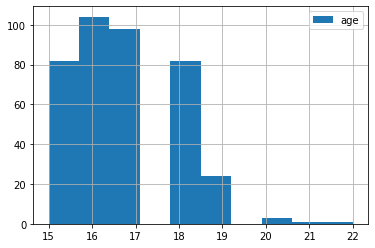

In [9]:
# Смотрим, какие значения содержит столбец age (возраст)
info_col('age')

В столбце 'age' содержатся данные о возрасте учеников. Согласно описанию, возраст от 15 до 22 лет, что соответствует данным в таблице. Данные на всех учеников заполнены, пропусков нет.

Информация о столбце m_edu 

Какие значения содержатся:


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: m_edu, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

<AxesSubplot:>

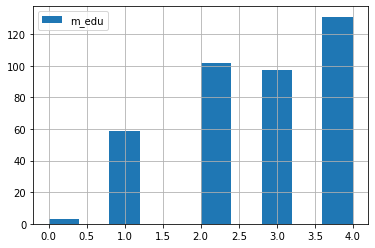

In [10]:
# Смотрим, какие значения содержит столбец m_edu (образование матери)
info_col('m_edu')

В столбце 'm_edu' содержатся данные об образовании матери. Значения должны принимать значения (0, 1, 2, 3, 4), что мы и наблюдаем. В столбце пропущены три значения.

Информация о столбце f_edu 

Какие значения содержатся:


2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: f_edu, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

<AxesSubplot:>

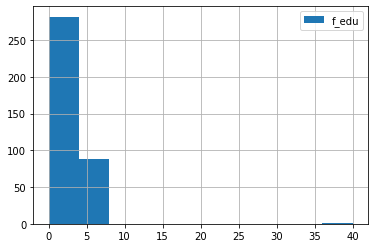

In [11]:
# Смотрим, какие значения содержит столбец f_edu (образование отца)
info_col('f_edu')

Информация о столбце f_edu 

Какие значения содержатся:


2.0    106
3.0     96
4.0     88
1.0     78
NaN     24
0.0      2
Name: f_edu, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   370 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


None

<AxesSubplot:>

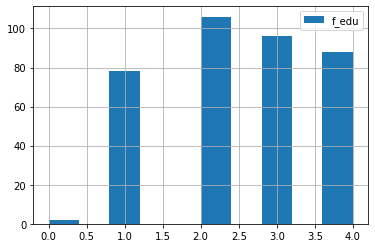

In [12]:
# Значения в этом столбце также должны принимать значения (0, 1, 2, 3, 4). Значение 40 - явная ошибка.
# Её нужно исправить. Так как достоверно неизвестно, какое значение должно быть, удаляем всю строку

exam.drop(exam[exam.f_edu == 40].index, inplace = True)
info_col('f_edu')

Теперь значения в столбце 'f_edu' приведены в норму. К сожалению, отсутствующих данных тут гораздо больше, чем в предыдущем столбце - отсутствуют 24 значения.

Информация о столбце travel_time 

Какие значения содержатся:


1.0    242
2.0     96
NaN     28
3.0     21
4.0      7
Name: travel_time, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  366 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


None

<AxesSubplot:>

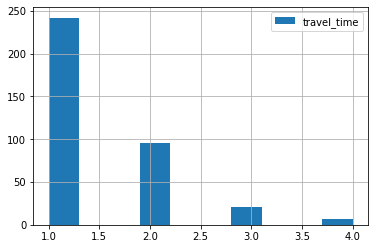

In [13]:
# Смотрим, какие значения содержит столбец travel_time (время в пути до школы)
info_col('travel_time')

Столбец не содержит аномальных значений. Отсутствующих данных тут ещё больше - 28.

Информация о столбце study_time 

Какие значения содержатся:


2.0    194
1.0    103
3.0     63
4.0     27
NaN      7
Name: study_time, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  387 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


None

<AxesSubplot:>

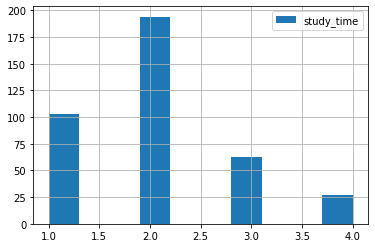

In [14]:
# Смотрим, какие значения содержит столбец study_time (время на учёбу помимо школы)
info_col('study_time')

Столбец не содержит ошибочных значений. Пропущенных значений 7.

Информация о столбце failures 

Какие значения содержатся:


0.0    292
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


None

<AxesSubplot:>

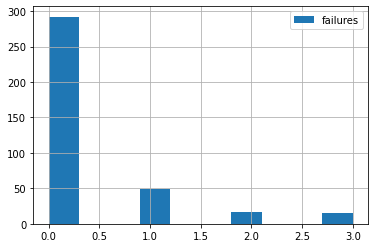

In [15]:
# Смотрим, какие значения содержит столбец failures (количество внеучебных неудач)
info_col('failures')

Столбец не содержит ошибочных значений. Пропущенных значений 22.

Информация о столбце fam_rel 

Какие значения содержатся:


 4.0    182
 5.0     98
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: fam_rel, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  367 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


None

<AxesSubplot:>

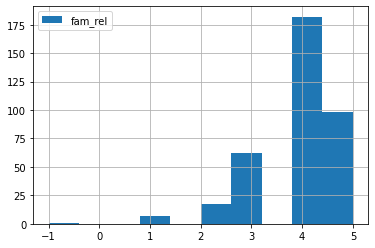

In [16]:
# Смотрим, какие значения содержит столбец fam_rel (семейные отношения)
info_col('fam_rel')

Информация о столбце fam_rel 

Какие значения содержатся:


4.0    182
5.0     98
3.0     62
NaN     27
2.0     17
1.0      7
Name: fam_rel, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

<AxesSubplot:>

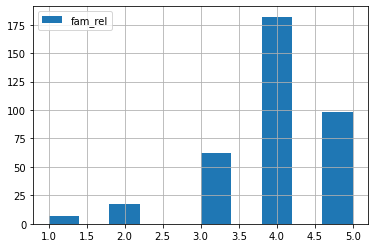

In [17]:
# Значение -1 является ошибкой, так как значения должны быть 1, 2, 3, 4 или 5. Удаляем строку с этим значением
exam.drop(exam[exam.fam_rel == -1].index, inplace = True)
info_col('fam_rel')

Теперь столбец не содержит ошибочных значений. Пропущенных значений 27

Информация о столбце free_time 

Какие значения содержатся:


3.0    153
4.0    112
2.0     61
5.0     38
1.0     18
NaN     11
Name: free_time, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

<AxesSubplot:>

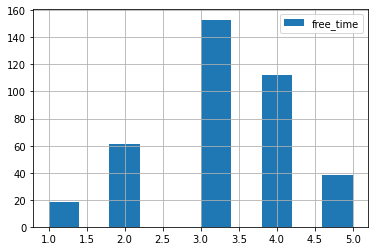

In [18]:
# Смотрим, какие значения содержит столбец free_time (свободное время после школы)
info_col('free_time')

Столбец не содержит ошибочных значений. Пропущенных значений 11.

Информация о столбце go_out 

Какие значения содержатся:


3.0    127
2.0     99
4.0     84
5.0     52
1.0     23
NaN      8
Name: go_out, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

<AxesSubplot:>

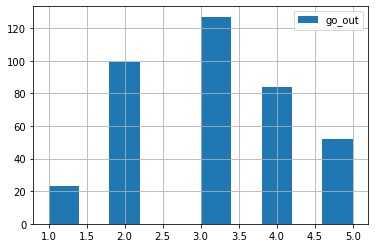

In [19]:
# Смотрим, какие значения содержит столбец go_out (время, проведённое с друзьями)
info_col('go_out')

Столбец не содержит ошибочных значений. Пропущенных значений 8.

Информация о столбце health 

Какие значения содержатся:


5.0    137
3.0     89
4.0     62
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

<AxesSubplot:>

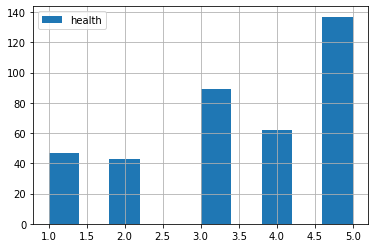

In [20]:
# Смотрим, какие значения содержит столбец health (текущее состояние здоровья)
info_col('health')

Столбец не содержит ошибочных значений. Пропущенных значений 15.

Информация о столбце absences 

Какие значения содержатся:


0.0      111
2.0       60
4.0       52
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      11
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


None

<AxesSubplot:>

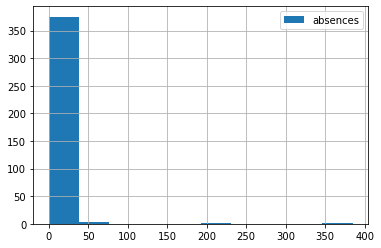

In [21]:
# Смотрим, какие значения содержит столбец absences (количество пропущенных занятий)
info_col('absences')

In [22]:
# Так как числовых данных достаточно много и они лежат в большом промежутке, проверим, есть ли здесь выбросы с помощью
# функции quan_info. Присвоим переменным low, high значения границ выбросов. 
quan_info('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [23]:
# Как видим, количество пропущенных занятий больше двадцати является выбросом.
# Анализируем значения в столбце, видим, что значение 22 встречается три раза.
# Большие значения встречаются по одному разу. Исходя из этого, считаем значения больше 22 
# выбросами и удаляем их из таблицы

# Проверяем, много ли таких учащихся.
len(exam[exam.absences > 22])

13

In [24]:
# Теперь удаляем всех учащихся, пропустивших больше двадцати двух занятий
exam.drop(exam[exam.absences > 22].index, inplace = True)

Из числовых колонок осталась только колонка score. Оставим её напоследок.
Теперь подобным образом просмотрим данные в нечисловых колонках

Информация о столбце school 

Какие значения содержатся:


GP    335
MS     45
Name: school, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  380 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

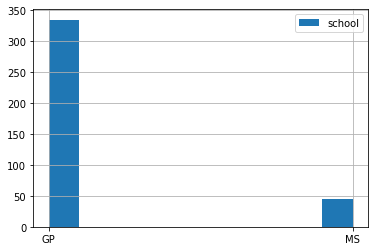

In [25]:
# Смотрим, какие значения содержит столбец school (аббревиатура школы)
info_col('school')

Колонка содержит только два значения. Данные заполнены полностью.

Информация о столбце sex 

Какие значения содержатся:


F    196
M    184
Name: sex, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     380 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

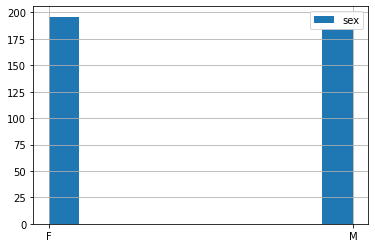

In [26]:
# Смотрим, какие значения содержит столбец sex (пол ученика)
info_col('sex')

Колонка содержит только два значения. Данные заполнены полностью.

Информация о столбце address 

Какие значения содержатся:


U      282
R       81
NaN     17
Name: address, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  363 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

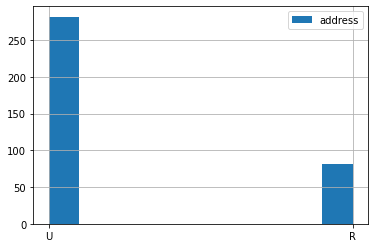

In [27]:
# Смотрим, какие значения содержит столбец address (тип адреса ученика)
info_col('address')

Колонка содержит только два значения. В данных пропущено 17 значений.

Информация о столбце fam_size 

Какие значения содержатся:


GT3    250
LE3    104
NaN     26
Name: fam_size, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  354 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

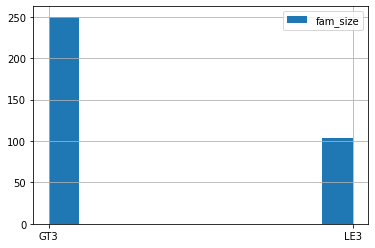

In [28]:
# Смотрим, какие значения содержит столбец fam_size (размер семьи)
info_col('fam_size')

Колонка содержит только два значения. В данных пропущено 25 значений.

Информация о столбце p_status 

Какие значения содержатся:


T      308
NaN     40
A       32
Name: p_status, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  340 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

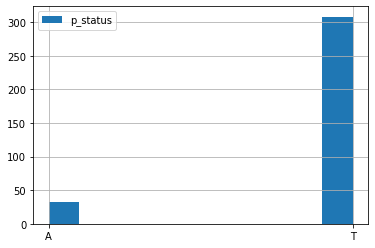

In [29]:
# Смотрим, какие значения содержит столбец p_status (статус совместного жилья родителей)
info_col('p_status')

Колонка содержит только два значения. В данных пропущено 38 значений.

Информация о столбце m_job 

Какие значения содержатся:


other       128
services     90
at_home      57
teacher      54
health       32
NaN          19
Name: m_job, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   361 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

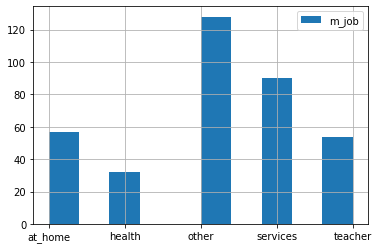

In [30]:
# Смотрим, какие значения содержит столбец m_job (работа матери)
info_col('m_job')

Как и положено, колонка содержит пять значений. В данных пропущено 17 значений.

Информация о столбце f_job 

Какие значения содержатся:


other       191
services     95
NaN          36
teacher      27
at_home      16
health       15
Name: f_job, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   344 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

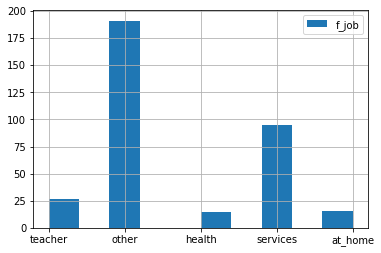

In [31]:
# Смотрим, какие значения содержит столбец f_job (работа отца)
info_col('f_job')

Как и положено, колонка содержит пять значений. В данных пропущено 35 значений.

Информация о столбце reason 

Какие значения содержатся:


course        135
reputation     99
home           96
other          33
NaN            17
Name: reason, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  363 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

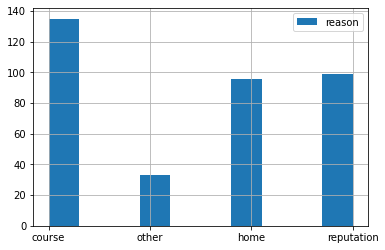

In [32]:
# Смотрим, какие значения содержит столбец reason (причина выбора школы)
info_col('reason')

Как и положено, колонка содержит четыре значения. В данных пропущено 17 значений.

Информация о столбце guardian 

Какие значения содержатся:


mother    239
father     85
NaN        30
other      26
Name: guardian, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  350 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

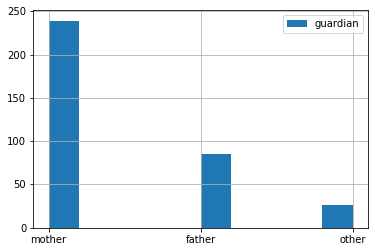

In [33]:
# Смотрим, какие значения содержит столбец guardian (опекун)
info_col('guardian')

Как и положено, колонка содержит три значения. В данных пропущено 30 значений.

Информация о столбце school_sup 

Какие значения содержатся:


no     323
yes     48
NaN      9
Name: school_sup, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  371 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

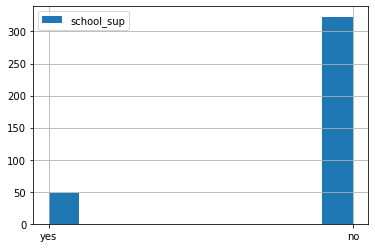

In [34]:
# Смотрим, какие значения содержит столбец school_sup (дополнительная образовательная поддержка)
info_col('school_sup')

Как и положено, колонка содержит два значения. В данных пропущено 9 значений.

Информация о столбце fam_sup 

Какие значения содержатся:


yes    209
no     135
NaN     36
Name: fam_sup, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  344 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

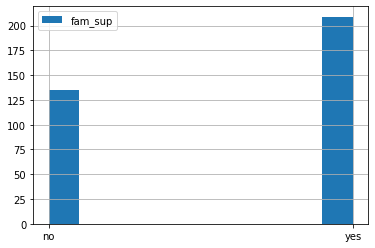

In [35]:
# Смотрим, какие значения содержит столбец fam_sup (семейная образовательная поддержка)
info_col('fam_sup')

Как и положено, колонка содержит два значения. В данных пропущено 35 значений.

Информация о столбце paid 

Какие значения содержатся:


no     193
yes    147
NaN     40
Name: paid, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    340 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

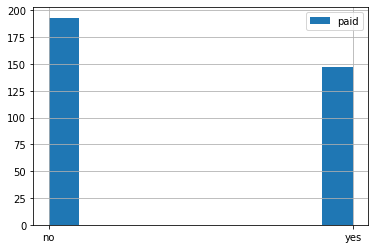

In [36]:
# Смотрим, какие значения содержит столбец paid (дополнительные платные занятия)
info_col('paid')

Как и положено, колонка содержит два значения. В данных пропущено 39 значений.

Информация о столбце activities 

Какие значения содержатся:


yes    190
no     176
NaN     14
Name: activities, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  366 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

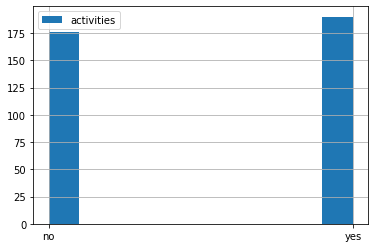

In [37]:
# Смотрим, какие значения содержит столбец activities (дополнительные внеучебные занятия)
info_col('activities')

Как и положено, колонка содержит два значения. В данных пропущено 14 значений.

Информация о столбце nursery 

Какие значения содержатся:


yes    288
no      76
NaN     16
Name: nursery, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  364 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

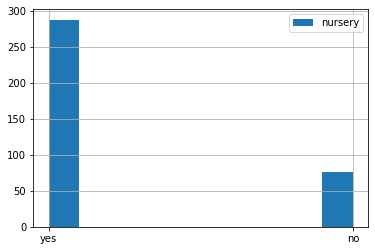

In [38]:
# Смотрим, какие значения содержит столбец nursery (посещал детский сад)
info_col('nursery')

Как и положено, колонка содержит два значения. В данных пропущено 16 значений.

Информация о столбце higher 

Какие значения содержатся:


yes    343
NaN     19
no      18
Name: higher, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  361 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

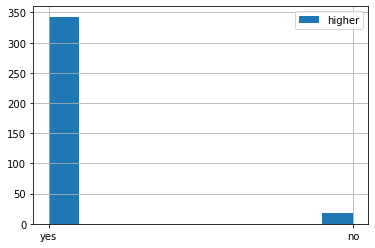

In [39]:
# Смотрим, какие значения содержит столбец higher (хочет получить высшее образование)
info_col('higher')

Как и положено, колонка содержит два значения. В данных пропущено 19 значений.

Информация о столбце internet 

Какие значения содержатся:


yes    292
no      55
NaN     33
Name: internet, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  347 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

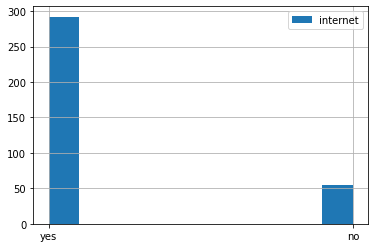

In [40]:
# Смотрим, какие значения содержит столбец internet (наличие интернета дома)
info_col('internet')

Как и положено, колонка содержит два значения. В данных пропущено 33 значения.

Информация о столбце romantic 

Какие значения содержатся:


no     233
yes    117
NaN     30
Name: romantic, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  350 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


None

<AxesSubplot:>

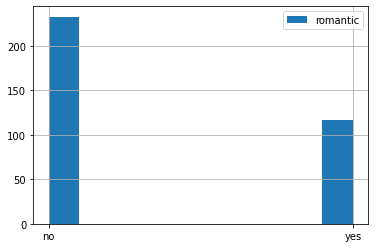

In [41]:
# Смотрим, какие значения содержит столбец romantic (в романтических отношениях)
info_col('romantic')

Как и положено, колонка содержит два значения. В данных пропущено 30 значений.

Информация о столбце score 

Какие значения содержатся:


50.0     54
55.0     43
0.0      37
75.0     33
60.0     30
65.0     30
40.0     27
70.0     27
45.0     24
80.0     16
30.0     14
90.0     11
35.0      9
25.0      7
NaN       6
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   374 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


None

<AxesSubplot:>

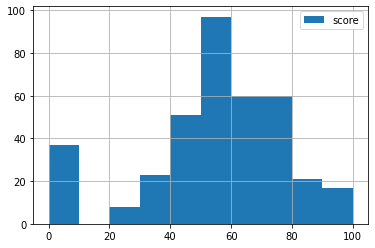

In [42]:
# Последней посмотрим на колонку с оценками score (баллы по госэкзамену по математике)
info_col('score')

Информация о столбце score 

Какие значения содержатся:


50.0     54
55.0     43
75.0     33
65.0     30
60.0     30
40.0     27
70.0     27
45.0     24
80.0     16
30.0     14
90.0     11
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Тип данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   337 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


None

<AxesSubplot:>

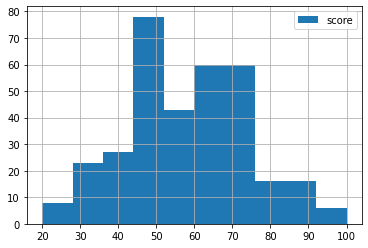

In [43]:
# Оценка 0 за экзамен означает, что ученик экзамен не сдавал либо что данные не занесены в таблицу.
# Исходя из этого, удаляем из таблицы строки с нулями.
exam.drop(exam[exam.score == 0].index, inplace = True)
# Исходя из требований алгоритма обучения модели, удаляем строки с пропусками. 
exam.drop(exam[exam.score.isnull()].index, inplace = True)
# Всего удаляем 43 строки

# Проверяем данные в столбце score
info_col('score')

In [44]:
# Печатаем информацию об итоговой таблице
exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       337 non-null    object 
 1   sex          337 non-null    object 
 2   age          337 non-null    int64  
 3   address      323 non-null    object 
 4   fam_size     314 non-null    object 
 5   p_status     301 non-null    object 
 6   m_edu        335 non-null    float64
 7   f_edu        317 non-null    float64
 8   m_job        320 non-null    object 
 9   f_job        305 non-null    object 
 10  reason       322 non-null    object 
 11  guardian     309 non-null    object 
 12  travel_time  314 non-null    float64
 13  study_time   330 non-null    float64
 14  failures     319 non-null    float64
 15  school_sup   328 non-null    object 
 16  fam_sup      304 non-null    object 
 17  paid         301 non-null    object 
 18  activities   325 non-null    object 
 19  nursery 

Таким образом, всего из начальной таблицы было удалено 58 строк и один столбец. В большинстве столбцов есть пропуски данных, что необходимо учитывать при дальнейшей обработке и анализе. В целом данные довольно чистые, было удалено незначительное количество выбросов и значений, не входящих в заданный диапазон.

Следующим этапом будет анализ взаимосвязи данных в числовых столбцах с помощью корреляционного анализа. Нам необходимо понять, нужно ли оставлять все столбцы или какие-то из них можно удалить без вреда. 

In [45]:
# Сбрасываем индексы строк итоговой таблицы
exam.reset_index(drop=True, inplace=True)

# Сохраняем копию таблицы с очищенными данными и всеми столбцами
exam_clear = exam.copy()

In [46]:
# Выводим на экран матрицу корреляционных коэффициентов.
exam.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.133259,-0.140614,0.112924,-0.007217,0.216994,0.059025,0.006312,0.129042,-0.066423,0.240463,-0.127914
m_edu,-0.133259,1.000000,0.611864,-0.175609,0.086299,-0.206660,-0.021849,0.024266,0.069610,-0.042431,0.068529,0.194148
f_edu,-0.140614,0.611864,1.000000,-0.158422,-0.013800,-0.286205,-0.029311,-0.021854,0.048184,0.018380,-0.015949,0.131379
travel_time,0.112924,-0.175609,-0.158422,1.000000,-0.101584,0.105774,-0.041746,-0.008925,0.023520,0.001315,-0.032573,-0.076276
study_time,-0.007217,0.086299,-0.013800,-0.101584,1.000000,-0.150634,0.042758,-0.135732,-0.018354,-0.086888,-0.095908,0.145299
failures,0.216994,-0.206660,-0.286205,0.105774,-0.150634,1.000000,0.029298,0.137760,0.129644,0.055693,0.170226,-0.292221
fam_rel,0.059025,-0.021849,-0.029311,-0.041746,0.042758,0.029298,1.000000,0.156660,0.027282,0.120908,-0.120555,0.048191
free_time,0.006312,0.024266,-0.021854,-0.008925,-0.135732,0.137760,0.156660,1.000000,0.280094,0.079714,0.050801,-0.009714
go_out,0.129042,0.069610,0.048184,0.023520,-0.018354,0.129644,0.027282,0.280094,1.000000,0.004015,0.133956,-0.177642
health,-0.066423,-0.042431,0.018380,0.001315,-0.086888,0.055693,0.120908,0.079714,0.004015,1.000000,-0.061822,-0.069054


In [47]:
# Наш целевой параметер - столбец score. Просматривая значения в нём, видим, что данные достаточно слабо скоррелированы, 
# что объясняется особенностями данных в этих столбцах (строго ограниченное количество вариантов).
# Однако видим, что четыре коэффициента имеют значения по модулю меньше 0.1
# Для упрощения дальнейшего анализа удалим эти столбцы, так как они крайне мало влияют на параметр score
exam.drop(['travel_time', 'fam_rel', 'free_time', 'health'], inplace=True, axis=1)

# Кроме того, видим аномально высокий для получившейся таблицы коэффициент (0,611) между столбцами m_edu и f_edu.

# Это можно объяснить тем, что люди подбирают себе партнёра с примерно равным уровнем образования.
# Будем считать, что одного из этих столбцов нам достаточно для анализа. Удалим столбец f_edu,
# поскольку у него наименьший коэффициент корреляции с score и в нём больше пропусков.
exam.drop(['f_edu'], inplace=True, axis=1)

In [48]:
exam.corr()

,age,m_edu,study_time,failures,go_out,absences,score
age,1.000000,-0.133259,-0.007217,0.216994,0.129042,0.240463,-0.127914
m_edu,-0.133259,1.000000,0.086299,-0.206660,0.069610,0.068529,0.194148
study_time,-0.007217,0.086299,1.000000,-0.150634,-0.018354,-0.095908,0.145299
failures,0.216994,-0.206660,-0.150634,1.000000,0.129644,0.170226,-0.292221
go_out,0.129042,0.069610,-0.018354,0.129644,1.000000,0.133956,-0.177642
absences,0.240463,0.068529,-0.095908,0.170226,0.133956,1.000000,-0.233326
score,-0.127914,0.194148,0.145299,-0.292221,-0.177642,-0.233326,1.000000


Таким образом, осталось 6 числовых столбцов для анализа.
Отдельно выделим два столбца, корреляция с которыми выше 0.2 по модулю: failures (количество внеучебных неудач) и absences(количество пропущенных занятий). Это наиболее влияющие на итоговую оценку параметры.

Теперь проверим значения в остальных столбцах. Воспользуемся тестом Стьюдента. 
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы с помощью ранее объявленной функции get_stat_dif. Так как для множественных сравнений используем довольно строгую поправку Бонферони, используем значение уровня доверия 10 %

In [49]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'f_job', 'm_job', 'reason', 'guardian', 'school_sup',
           'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для столбца sex
Найдены статистически значимые различия для столбца address
Найдены статистически значимые различия для столбца m_job
Найдены статистически значимые различия для столбца school_sup
Найдены статистически значимые различия для столбца higher


In [50]:
# С помощью теста Стьюдента нашли пять столбцов, которые стоит оставить в таблице. Удаляем остальные столбцы
exam.drop(['school', 'fam_size', 'p_status', 'f_job', 'reason', 'guardian', 'fam_sup',
           'paid', 'activities', 'nursery', 'internet', 'romantic'], inplace=True, axis=1)

In [51]:
# Итоговая таблица имеет вид
display(exam)

,sex,age,address,m_edu,m_job,study_time,failures,school_sup,higher,go_out,absences,score
0,F,18,U,4.0,at_home,2.0,0.0,yes,yes,4.0,6.0,30.0
1,F,17,U,1.0,at_home,2.0,0.0,no,yes,3.0,4.0,30.0
2,F,15,U,1.0,at_home,2.0,3.0,yes,yes,2.0,10.0,50.0
3,F,15,U,4.0,health,3.0,0.0,no,yes,2.0,2.0,75.0
4,F,16,U,3.0,other,2.0,0.0,no,yes,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
332,F,18,U,3.0,teacher,2.0,0.0,no,yes,4.0,0.0,40.0
333,M,17,U,3.0,services,1.0,0.0,no,yes,5.0,3.0,80.0
334,M,21,R,1.0,other,1.0,3.0,NaN,NaN,3.0,3.0,35.0
335,M,18,R,3.0,services,1.0,0.0,no,yes,1.0,0.0,50.0


In [52]:
# Информация об итоговой таблице.
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         337 non-null    object 
 1   age         337 non-null    int64  
 2   address     323 non-null    object 
 3   m_edu       335 non-null    float64
 4   m_job       320 non-null    object 
 5   study_time  330 non-null    float64
 6   failures    319 non-null    float64
 7   school_sup  328 non-null    object 
 8   higher      319 non-null    object 
 9   go_out      331 non-null    float64
 10  absences    327 non-null    float64
 11  score       337 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 31.7+ KB


В результате EDA для анализа влияния данных ученика на его оценку можно сделать следующие выводы:

1) В таблице содержится достаточно много пропусков. Это нужно учитывать при дальнейшем анализе.

2) Выбросов и явно ошибочных значений содержалось немного, то есть исходные данные достаточно чистые.

3) Для дальнейшего построения модели предлагается использовать получившиеся 12 столбцов. Однако при желании добавить информацию для анализа можно воспользоваться таблицей со всеми столбцами и очищенными данными exam_clear.

4) Из числовых столбцов, по всей видимости, нибольшее влияние на столбец score оказывают столбцы failures и absences.